In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    print('Результат: z =', sess.run(z))
    print('Результат: z =', z.eval())

Результат: z = 1
Результат: z = 1


In [3]:
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

z = 2*(a - b) + c
tf.print('Результат: z =', z)

Результат: z = 1


In [4]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('Результат: z =', sess.run(z, feed_dict=feed_dict))

Результат: z = 1


In [5]:
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Скалярные входные данные:', compute_z(1, 2, 3))
tf.print('Входные данные ранка 1:', compute_z([1], [2], [3]))
tf.print('Входные данные ранка 1:', compute_z([[1]], [[2]], [[3]]))

Скалярные входные данные: 1
Входные данные ранка 1: [1]
Входные данные ранка 1: [[1]]


In [6]:

@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Скалярные входные данные:', compute_z(1, 2, 3))
tf.print('Входные данные ранга 1:', compute_z([1], [2], [3]))
tf.print('Входные данные ранга 2:', compute_z([[1]], [[2]], [[3]]))

Скалярные входные данные: 1
Входные данные ранга 1: [1]
Входные данные ранга 2: [[1]]


In [7]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Входные данные ранга 1:', compute_z([1], [2], [3]))
tf.print('Входные данные ранга 1:', compute_z([1, 2], [2, 4], [3, 6]))

Входные данные ранга 1: [1]
Входные данные ранга 1: [1 2]


In [8]:
tf.TensorSpec(shape=[None], dtype=tf.int32)

TensorSpec(shape=(None,), dtype=tf.int32, name=None)

In [9]:
a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [10]:
w = tf.Variable([1, 2, 3], trainable=False)

print(w.trainable)

False


In [11]:
print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)

print(w.value())

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4])>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [12]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()

tf.print(init(shape=(3,)))


[-0.722795904 1.01456821 0.251808226]


In [13]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


In [14]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)
                
m = MyModule()
print('Все переменные модуля: ', [v.shape for v in m.variables])
print('Обучаемая переменная:   ', [v.shape for v in
                                 m.trainable_variables])

Все переменные модуля:  [TensorShape([2, 3]), TensorShape([1, 2])]
Обучаемая переменная:    [TensorShape([2, 3])]


In [15]:

import tensorflow as tf

tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))

@tf.function
def compute_z(x):    
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.8610158]
 [2.94593048]
 [3.82629013]]


In [16]:
import tensorflow as tf

w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)

tf.print('dL/dw : ', dloss_dw)

True True
dL/dw :  -0.559999764


In [17]:
tf.print(2*x * ((w*x + b) - y))

[-0.559999764]


In [18]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.square(y - z)

dloss_dx = tape.gradient(loss, x)

tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [19]:
tf.print(2*w * ((w*x + b) - y))

[-0.399999857]


In [20]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

tf.print('dL/dw:', dloss_dw)
tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764
dL/db: -0.399999857


In [21]:

optimizer = tf.keras.optimizers.SGD()

optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('Обновленный вес:', w)
tf.print('Обновленное смещение:', b)

Обновленный вес: 1.0056
Обновленное смещение: 0.504


In [22]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [23]:
for v in model.variables:
    print('{:20s}'.format(v.name), v.trainable, v.shape)
    

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


In [24]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16, 
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    ))

model.add(
    tf.keras.layers.Dense(
        units=32, 
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    ))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), 
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),])

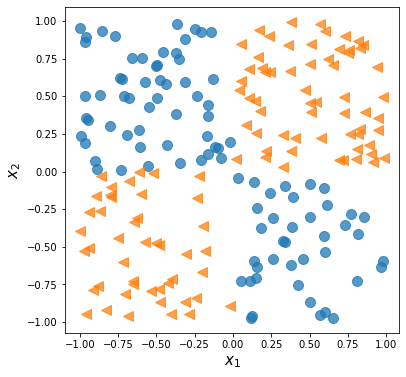

In [26]:
tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                input_shape=(2,), 
                                activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)


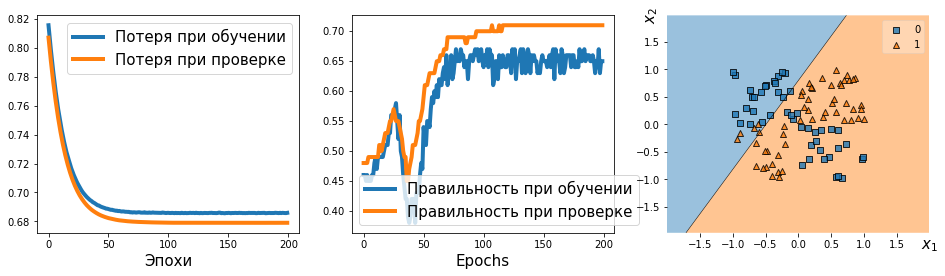

In [29]:

from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Потеря при обучении', 'Потеря при проверке'], fontsize=15)
ax.set_xlabel('Эпохи', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Правильность при обучении', 'Правильность при проверке'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [30]:
tf.random.set_seed(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

history = hist.history

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


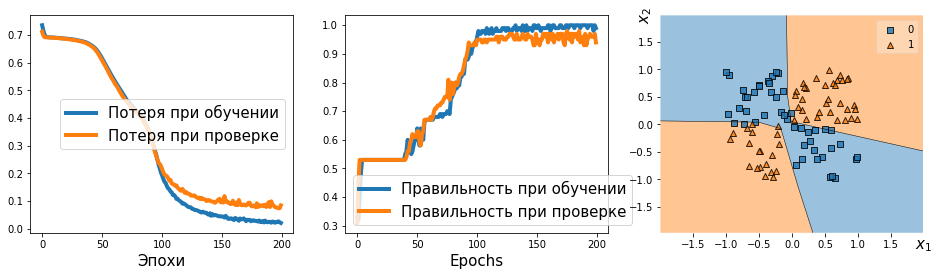

In [31]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Потеря при обучении', 'Потеря при проверке'], fontsize=15)
ax.set_xlabel('Эпохи', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Правильность при обучении', 'Правильность при проверке'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [32]:
tf.random.set_seed(1)

inputs = tf.keras.Input(shape=(2,))

h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


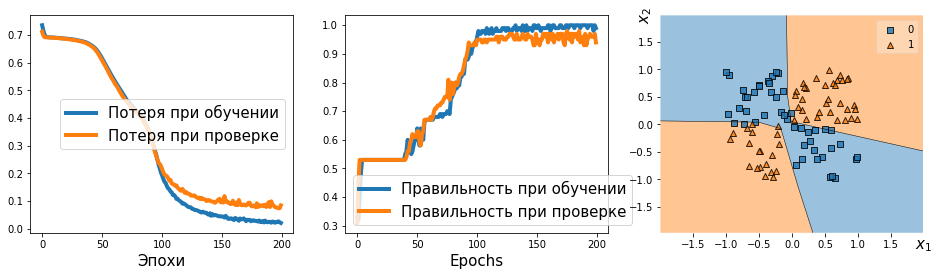

In [33]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Потеря при обучении', 'Потеря при проверке'], fontsize=15)
ax.set_xlabel('Эпохи', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Правильность при обучении', 'Правильность при проверке'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             multiple                  12        
_________________________________________________________________
dense_14 (Dense)             multiple                  20        
_________________________________________________________________
dense_15 (Dense)             multiple                  20        
_________________________________________________________________
dense_16 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


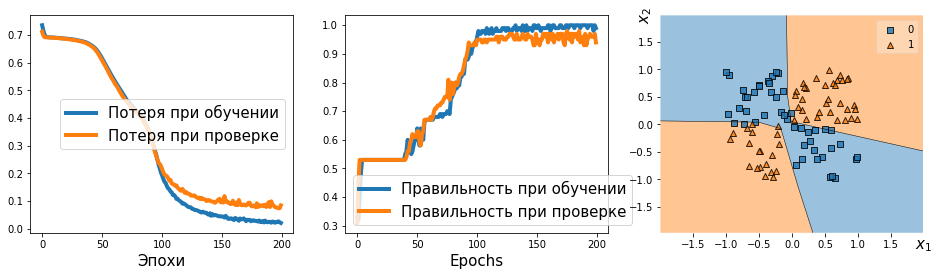

In [34]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)
    
tf.random.set_seed(1)

model = MyModel()
model.build(input_shape=(None, 2))

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Потеря при обучении', 'Потеря при проверке'], fontsize=15)
ax.set_xlabel('Эпохи', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Правильность при обучении', 'Правильность при проверке'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [35]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1], self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim),
                                     mean=0.0,
                                     stddev=self.noise_stddev)

            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                       'noise_stddev': self.noise_stddev})
        return config


tf.random.set_seed(1)

noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.00821428 0 0]]
[[0 0.0108502861 0 0]]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_1 (NoisyLinear) (None, 4)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


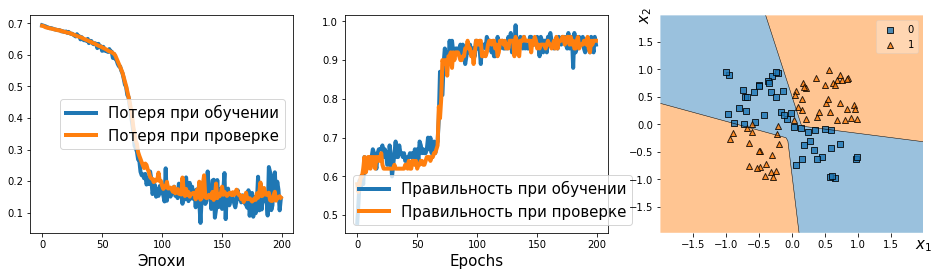

In [36]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.build(input_shape=(None, 2))
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, 
                 verbose=0)

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Потеря при обучении', 'Потеря при проверке'], fontsize=15)
ax.set_xlabel('Эпохи', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Правильность при обучении', 'Правильность при проверке'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [37]:

dataset_path = tf.keras.utils.get_file("auto-mpg.data", 
                                       ("http://archive.ics.uci.edu/ml/machine-learning-databases"
                                        "/auto-mpg/auto-mpg.data"))

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'ModelYear', 'Origin']

df = pd.read_csv(dataset_path, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [38]:
print(df.isna().sum())

df = df.dropna()
df = df.reset_index(drop=True)
df.tail()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [39]:
import sklearn
import sklearn.model_selection


df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)
train_stats = df_train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.666454,7.882043,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.412141,1.688796,3.0,4.0,4.0,6.0,8.0
Displacement,313.0,190.726837,102.400560,68.0,105.0,141.0,260.0,455.0
Horsepower,313.0,102.846645,36.888633,46.0,75.0,92.0,122.0,225.0
Weight,313.0,2946.830671,823.884366,1613.0,2226.0,2745.0,3570.0,5140.0
Acceleration,313.0,15.657188,2.721499,8.0,14.0,15.5,17.3,24.8
ModelYear,313.0,76.041534,3.735854,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.584665,0.804647,1.0,1.0,1.0,2.0,3.0


In [40]:
numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std
    
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
299,34.2,-0.836182,-0.837172,-0.890427,-0.906475,-0.902880,79,1
283,17.0,1.532370,1.115943,0.736090,1.084095,-0.094503,79,1
211,13.0,1.532370,1.555393,1.142719,1.345054,-1.343814,76,1
176,23.0,-0.836182,-0.690688,-0.402472,0.012343,0.493409,75,2
199,18.5,0.348094,0.578836,0.193918,0.847412,0.199453,76,1


In [41]:
numeric_features = []

for col_name in numeric_column_names:
    numeric_features.append(tf.feature_column.numeric_column(key=col_name))
    
numeric_features

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [42]:
feature_year = tf.feature_column.numeric_column(key="ModelYear")

bucketized_features = []

bucketized_features.append(tf.feature_column.bucketized_column(
    source_column=feature_year,
    boundaries=[73, 76, 79]))

print(bucketized_features)

[BucketizedColumn(source_column=NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(73, 76, 79))]


In [43]:
feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(
    key='Origin',
    vocabulary_list=[1, 2, 3])

categorical_indicator_features = []
categorical_indicator_features.append(tf.feature_column.indicator_column(feature_origin))

print(categorical_indicator_features)

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int32, default_value=-1, num_oov_buckets=0))]


In [44]:
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))

    # shuffle, repeat, and batch the examples
    return dataset.shuffle(1000).repeat().batch(batch_size)

ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print('Ключи:', batch[0].keys())
print('Пакет годов выпуска:', batch[0]['ModelYear'])

all_feature_columns = (numeric_features + 
                       bucketized_features + 
                       categorical_indicator_features)

print(all_feature_columns)
regressor = tf.estimator.DNNRegressor(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    model_dir='models/autompg-dnnregressor/')
EPOCHS = 1000
BATCH_SIZE = 8
total_steps = EPOCHS * int(np.ceil(len(df_train) / BATCH_SIZE))
print('Шаги обучения:', total_steps)

regressor.train(
    input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE),
    steps=total_steps)

Ключи: dict_keys(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin'])
Пакет годов выпуска: tf.Tensor([80 80 78 76 75 78 71 76], shape=(8,), dtype=int64)
[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), BucketizedColumn(source_column=NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(73, 76, 79)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int32, default_

INFO:tensorflow:global_step/sec: 2171.94
INFO:tensorflow:loss = 32.85088, step = 44000 (0.047 sec)
INFO:tensorflow:global_step/sec: 2171.92
INFO:tensorflow:loss = 12.203298, step = 44100 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.22
INFO:tensorflow:loss = 2.9504406, step = 44200 (0.045 sec)
INFO:tensorflow:global_step/sec: 2125.73
INFO:tensorflow:loss = 3.024532, step = 44300 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.93
INFO:tensorflow:loss = 35.141903, step = 44400 (0.047 sec)
INFO:tensorflow:global_step/sec: 2171.98
INFO:tensorflow:loss = 7.5775633, step = 44500 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.91
INFO:tensorflow:loss = 29.182858, step = 44600 (0.046 sec)
INFO:tensorflow:global_step/sec: 2125.72
INFO:tensorflow:loss = 1.9841664, step = 44700 (0.047 sec)
INFO:tensorflow:global_step/sec: 2220.23
INFO:tensorflow:loss = 30.164454, step = 44800 (0.045 sec)
INFO:tensorflow:global_step/sec: 2125.7
INFO:tensorflow:loss = 6.8882804, step = 44900 (0.047 sec)
INF

INFO:tensorflow:loss = 12.9279585, step = 52200 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.92
INFO:tensorflow:loss = 5.0561423, step = 52300 (0.045 sec)
INFO:tensorflow:global_step/sec: 2220.22
INFO:tensorflow:loss = 11.7946205, step = 52400 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.92
INFO:tensorflow:loss = 4.708455, step = 52500 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.94
INFO:tensorflow:loss = 3.3833773, step = 52600 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.21
INFO:tensorflow:loss = 2.149545, step = 52700 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.93
INFO:tensorflow:loss = 2.8766882, step = 52800 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.93
INFO:tensorflow:loss = 1.0064353, step = 52900 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.2
INFO:tensorflow:loss = 27.736605, step = 53000 (0.045 sec)
INFO:tensorflow:global_step/sec: 2220.22
INFO:tensorflow:loss = 25.186573, step = 53100 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.93
I

INFO:tensorflow:global_step/sec: 2220.23
INFO:tensorflow:loss = 1.7954664, step = 60500 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.93
INFO:tensorflow:loss = 8.405458, step = 60600 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.18
INFO:tensorflow:loss = 6.9993744, step = 60700 (0.045 sec)
INFO:tensorflow:global_step/sec: 2220.17
INFO:tensorflow:loss = 12.010698, step = 60800 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.98
INFO:tensorflow:loss = 4.883831, step = 60900 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.91
INFO:tensorflow:loss = 3.7821984, step = 61000 (0.045 sec)
INFO:tensorflow:global_step/sec: 2220.21
INFO:tensorflow:loss = 3.0595474, step = 61100 (0.046 sec)
INFO:tensorflow:global_step/sec: 2171.93
INFO:tensorflow:loss = 9.103712, step = 61200 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.94
INFO:tensorflow:loss = 3.7322683, step = 61300 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.21
INFO:tensorflow:loss = 4.5366645, step = 61400 (0.046 sec)
INF

INFO:tensorflow:loss = 13.898235, step = 68700 (0.045 sec)
INFO:tensorflow:global_step/sec: 2125.74
INFO:tensorflow:loss = 6.97199, step = 68800 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.18
INFO:tensorflow:loss = 30.274897, step = 68900 (0.046 sec)
INFO:tensorflow:global_step/sec: 2220.22
INFO:tensorflow:loss = 16.933346, step = 69000 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.92
INFO:tensorflow:loss = 21.483038, step = 69100 (0.045 sec)
INFO:tensorflow:global_step/sec: 2220.24
INFO:tensorflow:loss = 18.840136, step = 69200 (0.046 sec)
INFO:tensorflow:global_step/sec: 2125.69
INFO:tensorflow:loss = 2.7669, step = 69300 (0.046 sec)
INFO:tensorflow:global_step/sec: 2270.69
INFO:tensorflow:loss = 0.22314325, step = 69400 (0.045 sec)
INFO:tensorflow:global_step/sec: 2125.71
INFO:tensorflow:loss = 4.6588507, step = 69500 (0.046 sec)
INFO:tensorflow:global_step/sec: 2125.72
INFO:tensorflow:loss = 3.888289, step = 69600 (0.048 sec)
INFO:tensorflow:global_step/sec: 2125.7
INFO:t

INFO:tensorflow:global_step/sec: 2081.41
INFO:tensorflow:loss = 11.114565, step = 77000 (0.048 sec)
INFO:tensorflow:global_step/sec: 2081.42
INFO:tensorflow:loss = 5.1044827, step = 77100 (0.048 sec)
INFO:tensorflow:global_step/sec: 2038.99
INFO:tensorflow:loss = 3.559689, step = 77200 (0.049 sec)
INFO:tensorflow:global_step/sec: 2171.95
INFO:tensorflow:loss = 16.108103, step = 77300 (0.046 sec)
INFO:tensorflow:global_step/sec: 2125.72
INFO:tensorflow:loss = 6.05047, step = 77400 (0.047 sec)
INFO:tensorflow:global_step/sec: 2220.18
INFO:tensorflow:loss = 19.72303, step = 77500 (0.045 sec)
INFO:tensorflow:global_step/sec: 2081.44
INFO:tensorflow:loss = 4.6523013, step = 77600 (0.048 sec)
INFO:tensorflow:global_step/sec: 2220.21
INFO:tensorflow:loss = 5.515744, step = 77700 (0.045 sec)
INFO:tensorflow:global_step/sec: 2171.92
INFO:tensorflow:loss = 3.5130465, step = 77800 (0.046 sec)
INFO:tensorflow:global_step/sec: 2125.72
INFO:tensorflow:loss = 9.26213, step = 77900 (0.047 sec)
INFO:te

In [45]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [46]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

In [47]:
def preprocess(item):
    image = item['image']
    label = item['label']
    image = tf.image.convert_image_dtype(
        image, tf.float32)
    image = tf.reshape(image, (-1,))

    return {'image-pixels':image}, label[..., tf.newaxis]

def train_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_train = datasets['train']

    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

def eval_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset

In [48]:
image_feature_column = tf.feature_column.numeric_column(
    key='image-pixels', shape=(28*28))

In [49]:
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32, 16],
    n_classes=10,
    model_dir='models/mnist-dnn/')


dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 2.3101563, step = 0


INFO:tensorflow:loss = 2.3101563, step = 0


INFO:tensorflow:global_step/sec: 346.905


INFO:tensorflow:global_step/sec: 346.905


INFO:tensorflow:loss = 2.2364535, step = 100 (0.289 sec)


INFO:tensorflow:loss = 2.2364535, step = 100 (0.289 sec)


INFO:tensorflow:global_step/sec: 390.272


INFO:tensorflow:global_step/sec: 390.272


INFO:tensorflow:loss = 2.168842, step = 200 (0.256 sec)


INFO:tensorflow:loss = 2.168842, step = 200 (0.256 sec)


INFO:tensorflow:global_step/sec: 341.091


INFO:tensorflow:global_step/sec: 341.091


INFO:tensorflow:loss = 2.1501122, step = 300 (0.292 sec)


INFO:tensorflow:loss = 2.1501122, step = 300 (0.292 sec)


INFO:tensorflow:global_step/sec: 402.86


INFO:tensorflow:global_step/sec: 402.86


INFO:tensorflow:loss = 2.0361962, step = 400 (0.249 sec)


INFO:tensorflow:loss = 2.0361962, step = 400 (0.249 sec)


INFO:tensorflow:global_step/sec: 394.897


INFO:tensorflow:global_step/sec: 394.897


INFO:tensorflow:loss = 1.9470716, step = 500 (0.253 sec)


INFO:tensorflow:loss = 1.9470716, step = 500 (0.253 sec)


INFO:tensorflow:global_step/sec: 391.801


INFO:tensorflow:global_step/sec: 391.801


INFO:tensorflow:loss = 1.9122796, step = 600 (0.255 sec)


INFO:tensorflow:loss = 1.9122796, step = 600 (0.255 sec)


INFO:tensorflow:global_step/sec: 363.31


INFO:tensorflow:global_step/sec: 363.31


INFO:tensorflow:loss = 1.8483782, step = 700 (0.275 sec)


INFO:tensorflow:loss = 1.8483782, step = 700 (0.275 sec)


INFO:tensorflow:global_step/sec: 444.04


INFO:tensorflow:global_step/sec: 444.04


INFO:tensorflow:loss = 1.7961044, step = 800 (0.225 sec)


INFO:tensorflow:loss = 1.7961044, step = 800 (0.225 sec)


INFO:tensorflow:global_step/sec: 1387.61


INFO:tensorflow:global_step/sec: 1387.61


INFO:tensorflow:loss = 1.6985939, step = 900 (0.072 sec)


INFO:tensorflow:loss = 1.6985939, step = 900 (0.072 sec)


INFO:tensorflow:global_step/sec: 247.348


INFO:tensorflow:global_step/sec: 247.348


INFO:tensorflow:loss = 1.7267597, step = 1000 (0.405 sec)


INFO:tensorflow:loss = 1.7267597, step = 1000 (0.405 sec)


INFO:tensorflow:global_step/sec: 471.27


INFO:tensorflow:global_step/sec: 471.27


INFO:tensorflow:loss = 1.6277035, step = 1100 (0.211 sec)


INFO:tensorflow:loss = 1.6277035, step = 1100 (0.211 sec)


INFO:tensorflow:global_step/sec: 456.206


INFO:tensorflow:global_step/sec: 456.206


INFO:tensorflow:loss = 1.4991302, step = 1200 (0.220 sec)


INFO:tensorflow:loss = 1.4991302, step = 1200 (0.220 sec)


INFO:tensorflow:global_step/sec: 475.758


INFO:tensorflow:global_step/sec: 475.758


INFO:tensorflow:loss = 1.373858, step = 1300 (0.209 sec)


INFO:tensorflow:loss = 1.373858, step = 1300 (0.209 sec)


INFO:tensorflow:global_step/sec: 458.299


INFO:tensorflow:global_step/sec: 458.299


INFO:tensorflow:loss = 1.3935294, step = 1400 (0.218 sec)


INFO:tensorflow:loss = 1.3935294, step = 1400 (0.218 sec)


INFO:tensorflow:global_step/sec: 462.542


INFO:tensorflow:global_step/sec: 462.542


INFO:tensorflow:loss = 1.4062748, step = 1500 (0.217 sec)


INFO:tensorflow:loss = 1.4062748, step = 1500 (0.217 sec)


INFO:tensorflow:global_step/sec: 471.269


INFO:tensorflow:global_step/sec: 471.269


INFO:tensorflow:loss = 1.2066023, step = 1600 (0.211 sec)


INFO:tensorflow:loss = 1.2066023, step = 1600 (0.211 sec)


INFO:tensorflow:global_step/sec: 448.022


INFO:tensorflow:global_step/sec: 448.022


INFO:tensorflow:loss = 1.1777651, step = 1700 (0.223 sec)


INFO:tensorflow:loss = 1.1777651, step = 1700 (0.223 sec)


INFO:tensorflow:global_step/sec: 999.089


INFO:tensorflow:global_step/sec: 999.089


INFO:tensorflow:loss = 1.1525753, step = 1800 (0.100 sec)


INFO:tensorflow:loss = 1.1525753, step = 1800 (0.100 sec)


INFO:tensorflow:global_step/sec: 294.717


INFO:tensorflow:global_step/sec: 294.717


INFO:tensorflow:loss = 1.1393409, step = 1900 (0.339 sec)


INFO:tensorflow:loss = 1.1393409, step = 1900 (0.339 sec)


INFO:tensorflow:global_step/sec: 454.133


INFO:tensorflow:global_step/sec: 454.133


INFO:tensorflow:loss = 0.9537886, step = 2000 (0.221 sec)


INFO:tensorflow:loss = 0.9537886, step = 2000 (0.221 sec)


INFO:tensorflow:global_step/sec: 471.268


INFO:tensorflow:global_step/sec: 471.268


INFO:tensorflow:loss = 0.92808867, step = 2100 (0.211 sec)


INFO:tensorflow:loss = 0.92808867, step = 2100 (0.211 sec)


INFO:tensorflow:global_step/sec: 444.04


INFO:tensorflow:global_step/sec: 444.04


INFO:tensorflow:loss = 1.061678, step = 2200 (0.225 sec)


INFO:tensorflow:loss = 1.061678, step = 2200 (0.225 sec)


INFO:tensorflow:global_step/sec: 456.204


INFO:tensorflow:global_step/sec: 456.204


INFO:tensorflow:loss = 1.118434, step = 2300 (0.219 sec)


INFO:tensorflow:loss = 1.118434, step = 2300 (0.219 sec)


INFO:tensorflow:global_step/sec: 475.76


INFO:tensorflow:global_step/sec: 475.76


INFO:tensorflow:loss = 0.97631174, step = 2400 (0.210 sec)


INFO:tensorflow:loss = 0.97631174, step = 2400 (0.210 sec)


INFO:tensorflow:global_step/sec: 452.077


INFO:tensorflow:global_step/sec: 452.077


INFO:tensorflow:loss = 0.8959867, step = 2500 (0.221 sec)


INFO:tensorflow:loss = 0.8959867, step = 2500 (0.221 sec)


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:loss = 1.0433731, step = 2600 (0.213 sec)


INFO:tensorflow:loss = 1.0433731, step = 2600 (0.213 sec)


INFO:tensorflow:global_step/sec: 605.51


INFO:tensorflow:global_step/sec: 605.51


INFO:tensorflow:loss = 1.0154896, step = 2700 (0.165 sec)


INFO:tensorflow:loss = 1.0154896, step = 2700 (0.165 sec)


INFO:tensorflow:global_step/sec: 1513.77


INFO:tensorflow:global_step/sec: 1513.77


INFO:tensorflow:loss = 0.9161079, step = 2800 (0.066 sec)


INFO:tensorflow:loss = 0.9161079, step = 2800 (0.066 sec)


INFO:tensorflow:global_step/sec: 230.205


INFO:tensorflow:global_step/sec: 230.205


INFO:tensorflow:loss = 1.0403264, step = 2900 (0.434 sec)


INFO:tensorflow:loss = 1.0403264, step = 2900 (0.434 sec)


INFO:tensorflow:global_step/sec: 460.41


INFO:tensorflow:global_step/sec: 460.41


INFO:tensorflow:loss = 0.8255062, step = 3000 (0.217 sec)


INFO:tensorflow:loss = 0.8255062, step = 3000 (0.217 sec)


INFO:tensorflow:global_step/sec: 460.412


INFO:tensorflow:global_step/sec: 460.412


INFO:tensorflow:loss = 0.9951886, step = 3100 (0.217 sec)


INFO:tensorflow:loss = 0.9951886, step = 3100 (0.217 sec)


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:loss = 0.91730535, step = 3200 (0.214 sec)


INFO:tensorflow:loss = 0.91730535, step = 3200 (0.214 sec)


INFO:tensorflow:global_step/sec: 462.541


INFO:tensorflow:global_step/sec: 462.541


INFO:tensorflow:loss = 0.7534137, step = 3300 (0.215 sec)


INFO:tensorflow:loss = 0.7534137, step = 3300 (0.215 sec)


INFO:tensorflow:global_step/sec: 458.299


INFO:tensorflow:global_step/sec: 458.299


INFO:tensorflow:loss = 0.7605686, step = 3400 (0.219 sec)


INFO:tensorflow:loss = 0.7605686, step = 3400 (0.219 sec)


INFO:tensorflow:global_step/sec: 436.285


INFO:tensorflow:global_step/sec: 436.285


INFO:tensorflow:loss = 0.7933878, step = 3500 (0.228 sec)


INFO:tensorflow:loss = 0.7933878, step = 3500 (0.228 sec)


INFO:tensorflow:global_step/sec: 469.056


INFO:tensorflow:global_step/sec: 469.056


INFO:tensorflow:loss = 0.74751174, step = 3600 (0.214 sec)


INFO:tensorflow:loss = 0.74751174, step = 3600 (0.214 sec)


INFO:tensorflow:global_step/sec: 1469.26


INFO:tensorflow:global_step/sec: 1469.26


INFO:tensorflow:loss = 0.76424825, step = 3700 (0.067 sec)


INFO:tensorflow:loss = 0.76424825, step = 3700 (0.067 sec)


INFO:tensorflow:global_step/sec: 272.976


INFO:tensorflow:global_step/sec: 272.976


INFO:tensorflow:loss = 0.7562122, step = 3800 (0.366 sec)


INFO:tensorflow:loss = 0.7562122, step = 3800 (0.366 sec)


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:loss = 0.7666491, step = 3900 (0.207 sec)


INFO:tensorflow:loss = 0.7666491, step = 3900 (0.207 sec)


INFO:tensorflow:global_step/sec: 484.997


INFO:tensorflow:global_step/sec: 484.997


INFO:tensorflow:loss = 0.83354306, step = 4000 (0.206 sec)


INFO:tensorflow:loss = 0.83354306, step = 4000 (0.206 sec)


INFO:tensorflow:global_step/sec: 456.205


INFO:tensorflow:global_step/sec: 456.205


INFO:tensorflow:loss = 0.70140916, step = 4100 (0.220 sec)


INFO:tensorflow:loss = 0.70140916, step = 4100 (0.220 sec)


INFO:tensorflow:global_step/sec: 450.038


INFO:tensorflow:global_step/sec: 450.038


INFO:tensorflow:loss = 0.7217768, step = 4200 (0.222 sec)


INFO:tensorflow:loss = 0.7217768, step = 4200 (0.222 sec)


INFO:tensorflow:global_step/sec: 464.697


INFO:tensorflow:global_step/sec: 464.697


INFO:tensorflow:loss = 0.69793653, step = 4300 (0.214 sec)


INFO:tensorflow:loss = 0.69793653, step = 4300 (0.214 sec)


INFO:tensorflow:global_step/sec: 475.756


INFO:tensorflow:global_step/sec: 475.756


INFO:tensorflow:loss = 0.54119205, step = 4400 (0.211 sec)


INFO:tensorflow:loss = 0.54119205, step = 4400 (0.211 sec)


INFO:tensorflow:global_step/sec: 475.759


INFO:tensorflow:global_step/sec: 475.759


INFO:tensorflow:loss = 0.65049523, step = 4500 (0.210 sec)


INFO:tensorflow:loss = 0.65049523, step = 4500 (0.210 sec)


INFO:tensorflow:global_step/sec: 768.53


INFO:tensorflow:global_step/sec: 768.53


INFO:tensorflow:loss = 0.52206856, step = 4600 (0.130 sec)


INFO:tensorflow:loss = 0.52206856, step = 4600 (0.130 sec)


INFO:tensorflow:global_step/sec: 313.195


INFO:tensorflow:global_step/sec: 313.195


INFO:tensorflow:loss = 0.633687, step = 4700 (0.319 sec)


INFO:tensorflow:loss = 0.633687, step = 4700 (0.319 sec)


INFO:tensorflow:global_step/sec: 478.035


INFO:tensorflow:global_step/sec: 478.035


INFO:tensorflow:loss = 0.6924256, step = 4800 (0.209 sec)


INFO:tensorflow:loss = 0.6924256, step = 4800 (0.209 sec)


INFO:tensorflow:global_step/sec: 489.751


INFO:tensorflow:global_step/sec: 489.751


INFO:tensorflow:loss = 0.6408788, step = 4900 (0.204 sec)


INFO:tensorflow:loss = 0.6408788, step = 4900 (0.204 sec)


INFO:tensorflow:global_step/sec: 482.65


INFO:tensorflow:global_step/sec: 482.65


INFO:tensorflow:loss = 0.66618603, step = 5000 (0.207 sec)


INFO:tensorflow:loss = 0.66618603, step = 5000 (0.207 sec)


INFO:tensorflow:global_step/sec: 484.997


INFO:tensorflow:global_step/sec: 484.997


INFO:tensorflow:loss = 0.6898053, step = 5100 (0.206 sec)


INFO:tensorflow:loss = 0.6898053, step = 5100 (0.206 sec)


INFO:tensorflow:global_step/sec: 480.334


INFO:tensorflow:global_step/sec: 480.334


INFO:tensorflow:loss = 0.58072436, step = 5200 (0.208 sec)


INFO:tensorflow:loss = 0.58072436, step = 5200 (0.208 sec)


INFO:tensorflow:global_step/sec: 466.864


INFO:tensorflow:global_step/sec: 466.864


INFO:tensorflow:loss = 0.70947707, step = 5300 (0.214 sec)


INFO:tensorflow:loss = 0.70947707, step = 5300 (0.214 sec)


INFO:tensorflow:global_step/sec: 471.269


INFO:tensorflow:global_step/sec: 471.269


INFO:tensorflow:loss = 0.5250633, step = 5400 (0.212 sec)


INFO:tensorflow:loss = 0.5250633, step = 5400 (0.212 sec)


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:loss = 0.672304, step = 5500 (0.183 sec)


INFO:tensorflow:loss = 0.672304, step = 5500 (0.183 sec)


INFO:tensorflow:global_step/sec: 1561.08


INFO:tensorflow:global_step/sec: 1561.08


INFO:tensorflow:loss = 0.63781834, step = 5600 (0.064 sec)


INFO:tensorflow:loss = 0.63781834, step = 5600 (0.064 sec)


INFO:tensorflow:global_step/sec: 247.913


INFO:tensorflow:global_step/sec: 247.913


INFO:tensorflow:loss = 0.5673566, step = 5700 (0.403 sec)


INFO:tensorflow:loss = 0.5673566, step = 5700 (0.403 sec)


INFO:tensorflow:global_step/sec: 473.502


INFO:tensorflow:global_step/sec: 473.502


INFO:tensorflow:loss = 0.58748907, step = 5800 (0.210 sec)


INFO:tensorflow:loss = 0.58748907, step = 5800 (0.210 sec)


INFO:tensorflow:global_step/sec: 482.654


INFO:tensorflow:global_step/sec: 482.654


INFO:tensorflow:loss = 0.6600109, step = 5900 (0.208 sec)


INFO:tensorflow:loss = 0.6600109, step = 5900 (0.208 sec)


INFO:tensorflow:global_step/sec: 482.652


INFO:tensorflow:global_step/sec: 482.652


INFO:tensorflow:loss = 0.46912873, step = 6000 (0.207 sec)


INFO:tensorflow:loss = 0.46912873, step = 6000 (0.207 sec)


INFO:tensorflow:global_step/sec: 487.36


INFO:tensorflow:global_step/sec: 487.36


INFO:tensorflow:loss = 0.5886735, step = 6100 (0.205 sec)


INFO:tensorflow:loss = 0.5886735, step = 6100 (0.205 sec)


INFO:tensorflow:global_step/sec: 487.364


INFO:tensorflow:global_step/sec: 487.364


INFO:tensorflow:loss = 0.5637485, step = 6200 (0.204 sec)


INFO:tensorflow:loss = 0.5637485, step = 6200 (0.204 sec)


INFO:tensorflow:global_step/sec: 484.996


INFO:tensorflow:global_step/sec: 484.996


INFO:tensorflow:loss = 0.5048368, step = 6300 (0.207 sec)


INFO:tensorflow:loss = 0.5048368, step = 6300 (0.207 sec)


INFO:tensorflow:global_step/sec: 454.129


INFO:tensorflow:global_step/sec: 454.129


INFO:tensorflow:loss = 0.5167168, step = 6400 (0.220 sec)


INFO:tensorflow:loss = 0.5167168, step = 6400 (0.220 sec)


INFO:tensorflow:global_step/sec: 1110.11


INFO:tensorflow:global_step/sec: 1110.11


INFO:tensorflow:loss = 0.5583717, step = 6500 (0.091 sec)


INFO:tensorflow:loss = 0.5583717, step = 6500 (0.091 sec)


INFO:tensorflow:global_step/sec: 276.757


INFO:tensorflow:global_step/sec: 276.757


INFO:tensorflow:loss = 0.5235466, step = 6600 (0.360 sec)


INFO:tensorflow:loss = 0.5235466, step = 6600 (0.360 sec)


INFO:tensorflow:global_step/sec: 432.507


INFO:tensorflow:global_step/sec: 432.507


INFO:tensorflow:loss = 0.5631362, step = 6700 (0.232 sec)


INFO:tensorflow:loss = 0.5631362, step = 6700 (0.232 sec)


INFO:tensorflow:global_step/sec: 412.848


INFO:tensorflow:global_step/sec: 412.848


INFO:tensorflow:loss = 0.5044688, step = 6800 (0.242 sec)


INFO:tensorflow:loss = 0.5044688, step = 6800 (0.242 sec)


INFO:tensorflow:global_step/sec: 426.962


INFO:tensorflow:global_step/sec: 426.962


INFO:tensorflow:loss = 0.47980872, step = 6900 (0.234 sec)


INFO:tensorflow:loss = 0.47980872, step = 6900 (0.234 sec)


INFO:tensorflow:global_step/sec: 434.386


INFO:tensorflow:global_step/sec: 434.386


INFO:tensorflow:loss = 0.45372224, step = 7000 (0.229 sec)


INFO:tensorflow:loss = 0.45372224, step = 7000 (0.229 sec)


INFO:tensorflow:global_step/sec: 454.133


INFO:tensorflow:global_step/sec: 454.133


INFO:tensorflow:loss = 0.6454352, step = 7100 (0.220 sec)


INFO:tensorflow:loss = 0.6454352, step = 7100 (0.220 sec)


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:loss = 0.4211782, step = 7200 (0.212 sec)


INFO:tensorflow:loss = 0.4211782, step = 7200 (0.212 sec)


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:loss = 0.46837538, step = 7300 (0.214 sec)


INFO:tensorflow:loss = 0.46837538, step = 7300 (0.214 sec)


INFO:tensorflow:global_step/sec: 657.297


INFO:tensorflow:global_step/sec: 657.297


INFO:tensorflow:loss = 0.47596514, step = 7400 (0.152 sec)


INFO:tensorflow:loss = 0.47596514, step = 7400 (0.152 sec)


INFO:tensorflow:global_step/sec: 1387.62


INFO:tensorflow:global_step/sec: 1387.62


INFO:tensorflow:loss = 0.64211583, step = 7500 (0.072 sec)


INFO:tensorflow:loss = 0.64211583, step = 7500 (0.072 sec)


INFO:tensorflow:global_step/sec: 222.02


INFO:tensorflow:global_step/sec: 222.02


INFO:tensorflow:loss = 0.44671747, step = 7600 (0.450 sec)


INFO:tensorflow:loss = 0.44671747, step = 7600 (0.450 sec)


INFO:tensorflow:global_step/sec: 464.694


INFO:tensorflow:global_step/sec: 464.694


INFO:tensorflow:loss = 0.3576331, step = 7700 (0.215 sec)


INFO:tensorflow:loss = 0.3576331, step = 7700 (0.215 sec)


INFO:tensorflow:global_step/sec: 484.995


INFO:tensorflow:global_step/sec: 484.995


INFO:tensorflow:loss = 0.3328594, step = 7800 (0.206 sec)


INFO:tensorflow:loss = 0.3328594, step = 7800 (0.206 sec)


INFO:tensorflow:global_step/sec: 475.758


INFO:tensorflow:global_step/sec: 475.758


INFO:tensorflow:loss = 0.5166863, step = 7900 (0.210 sec)


INFO:tensorflow:loss = 0.5166863, step = 7900 (0.210 sec)


INFO:tensorflow:global_step/sec: 473.502


INFO:tensorflow:global_step/sec: 473.502


INFO:tensorflow:loss = 0.44053036, step = 8000 (0.211 sec)


INFO:tensorflow:loss = 0.44053036, step = 8000 (0.211 sec)


INFO:tensorflow:global_step/sec: 480.333


INFO:tensorflow:global_step/sec: 480.333


INFO:tensorflow:loss = 0.44795084, step = 8100 (0.208 sec)


INFO:tensorflow:loss = 0.44795084, step = 8100 (0.208 sec)


INFO:tensorflow:global_step/sec: 456.206


INFO:tensorflow:global_step/sec: 456.206


INFO:tensorflow:loss = 0.47964925, step = 8200 (0.220 sec)


INFO:tensorflow:loss = 0.47964925, step = 8200 (0.220 sec)


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:global_step/sec: 469.057


INFO:tensorflow:loss = 0.46291348, step = 8300 (0.212 sec)


INFO:tensorflow:loss = 0.46291348, step = 8300 (0.212 sec)


INFO:tensorflow:global_step/sec: 1427.28


INFO:tensorflow:global_step/sec: 1427.28


INFO:tensorflow:loss = 0.6091695, step = 8400 (0.070 sec)


INFO:tensorflow:loss = 0.6091695, step = 8400 (0.070 sec)


INFO:tensorflow:global_step/sec: 256.177


INFO:tensorflow:global_step/sec: 256.177


INFO:tensorflow:loss = 0.49178398, step = 8500 (0.390 sec)


INFO:tensorflow:loss = 0.49178398, step = 8500 (0.390 sec)


INFO:tensorflow:global_step/sec: 450.04


INFO:tensorflow:global_step/sec: 450.04


INFO:tensorflow:loss = 0.39947206, step = 8600 (0.221 sec)


INFO:tensorflow:loss = 0.39947206, step = 8600 (0.221 sec)


INFO:tensorflow:global_step/sec: 464.695


INFO:tensorflow:global_step/sec: 464.695


INFO:tensorflow:loss = 0.62434006, step = 8700 (0.216 sec)


INFO:tensorflow:loss = 0.62434006, step = 8700 (0.216 sec)


INFO:tensorflow:global_step/sec: 471.267


INFO:tensorflow:global_step/sec: 471.267


INFO:tensorflow:loss = 0.5003894, step = 8800 (0.212 sec)


INFO:tensorflow:loss = 0.5003894, step = 8800 (0.212 sec)


INFO:tensorflow:global_step/sec: 466.866


INFO:tensorflow:global_step/sec: 466.866


INFO:tensorflow:loss = 0.4898902, step = 8900 (0.214 sec)


INFO:tensorflow:loss = 0.4898902, step = 8900 (0.214 sec)


INFO:tensorflow:global_step/sec: 458.3


INFO:tensorflow:global_step/sec: 458.3


INFO:tensorflow:loss = 0.47962356, step = 9000 (0.218 sec)


INFO:tensorflow:loss = 0.47962356, step = 9000 (0.218 sec)


INFO:tensorflow:global_step/sec: 482.65


INFO:tensorflow:global_step/sec: 482.65


INFO:tensorflow:loss = 0.34372494, step = 9100 (0.207 sec)


INFO:tensorflow:loss = 0.34372494, step = 9100 (0.207 sec)


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:loss = 0.24089944, step = 9200 (0.207 sec)


INFO:tensorflow:loss = 0.24089944, step = 9200 (0.207 sec)


INFO:tensorflow:global_step/sec: 942.544


INFO:tensorflow:global_step/sec: 942.544


INFO:tensorflow:loss = 0.4624578, step = 9300 (0.106 sec)


INFO:tensorflow:loss = 0.4624578, step = 9300 (0.106 sec)


INFO:tensorflow:global_step/sec: 320.221


INFO:tensorflow:global_step/sec: 320.221


INFO:tensorflow:loss = 0.34841767, step = 9400 (0.312 sec)


INFO:tensorflow:loss = 0.34841767, step = 9400 (0.312 sec)


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:loss = 0.50558037, step = 9500 (0.208 sec)


INFO:tensorflow:loss = 0.50558037, step = 9500 (0.208 sec)


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:loss = 0.5716984, step = 9600 (0.207 sec)


INFO:tensorflow:loss = 0.5716984, step = 9600 (0.207 sec)


INFO:tensorflow:global_step/sec: 487.361


INFO:tensorflow:global_step/sec: 487.361


INFO:tensorflow:loss = 0.42600015, step = 9700 (0.205 sec)


INFO:tensorflow:loss = 0.42600015, step = 9700 (0.205 sec)


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:loss = 0.375213, step = 9800 (0.207 sec)


INFO:tensorflow:loss = 0.375213, step = 9800 (0.207 sec)


INFO:tensorflow:global_step/sec: 480.332


INFO:tensorflow:global_step/sec: 480.332


INFO:tensorflow:loss = 0.40686095, step = 9900 (0.208 sec)


INFO:tensorflow:loss = 0.40686095, step = 9900 (0.208 sec)


INFO:tensorflow:global_step/sec: 480.333


INFO:tensorflow:global_step/sec: 480.333


INFO:tensorflow:loss = 0.45440546, step = 10000 (0.208 sec)


INFO:tensorflow:loss = 0.45440546, step = 10000 (0.208 sec)


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:loss = 0.47421014, step = 10100 (0.208 sec)


INFO:tensorflow:loss = 0.47421014, step = 10100 (0.208 sec)


INFO:tensorflow:global_step/sec: 601.862


INFO:tensorflow:global_step/sec: 601.862


INFO:tensorflow:loss = 0.4821458, step = 10200 (0.166 sec)


INFO:tensorflow:loss = 0.4821458, step = 10200 (0.166 sec)


INFO:tensorflow:global_step/sec: 1491.19


INFO:tensorflow:global_step/sec: 1491.19


INFO:tensorflow:loss = 0.4925304, step = 10300 (0.067 sec)


INFO:tensorflow:loss = 0.4925304, step = 10300 (0.067 sec)


INFO:tensorflow:global_step/sec: 251.66


INFO:tensorflow:global_step/sec: 251.66


INFO:tensorflow:loss = 0.3290844, step = 10400 (0.397 sec)


INFO:tensorflow:loss = 0.3290844, step = 10400 (0.397 sec)


INFO:tensorflow:global_step/sec: 482.655


INFO:tensorflow:global_step/sec: 482.655


INFO:tensorflow:loss = 0.36355132, step = 10500 (0.207 sec)


INFO:tensorflow:loss = 0.36355132, step = 10500 (0.207 sec)


INFO:tensorflow:global_step/sec: 489.748


INFO:tensorflow:global_step/sec: 489.748


INFO:tensorflow:loss = 0.5367662, step = 10600 (0.204 sec)


INFO:tensorflow:loss = 0.5367662, step = 10600 (0.204 sec)


INFO:tensorflow:global_step/sec: 484.996


INFO:tensorflow:global_step/sec: 484.996


INFO:tensorflow:loss = 0.28106403, step = 10700 (0.206 sec)


INFO:tensorflow:loss = 0.28106403, step = 10700 (0.206 sec)


INFO:tensorflow:global_step/sec: 478.035


INFO:tensorflow:global_step/sec: 478.035


INFO:tensorflow:loss = 0.48263004, step = 10800 (0.209 sec)


INFO:tensorflow:loss = 0.48263004, step = 10800 (0.209 sec)


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:global_step/sec: 480.331


INFO:tensorflow:loss = 0.52753866, step = 10900 (0.208 sec)


INFO:tensorflow:loss = 0.52753866, step = 10900 (0.208 sec)


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:loss = 0.5372714, step = 11000 (0.207 sec)


INFO:tensorflow:loss = 0.5372714, step = 11000 (0.207 sec)


INFO:tensorflow:global_step/sec: 471.27


INFO:tensorflow:global_step/sec: 471.27


INFO:tensorflow:loss = 0.46218753, step = 11100 (0.211 sec)


INFO:tensorflow:loss = 0.46218753, step = 11100 (0.211 sec)


INFO:tensorflow:global_step/sec: 1513.78


INFO:tensorflow:global_step/sec: 1513.78


INFO:tensorflow:loss = 0.39897645, step = 11200 (0.067 sec)


INFO:tensorflow:loss = 0.39897645, step = 11200 (0.067 sec)


INFO:tensorflow:global_step/sec: 285.454


INFO:tensorflow:global_step/sec: 285.454


INFO:tensorflow:loss = 0.61987203, step = 11300 (0.349 sec)


INFO:tensorflow:loss = 0.61987203, step = 11300 (0.349 sec)


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:global_step/sec: 482.653


INFO:tensorflow:loss = 0.5400158, step = 11400 (0.208 sec)


INFO:tensorflow:loss = 0.5400158, step = 11400 (0.208 sec)


INFO:tensorflow:global_step/sec: 478.032


INFO:tensorflow:global_step/sec: 478.032


INFO:tensorflow:loss = 0.39864823, step = 11500 (0.209 sec)


INFO:tensorflow:loss = 0.39864823, step = 11500 (0.209 sec)


INFO:tensorflow:global_step/sec: 478.036


INFO:tensorflow:global_step/sec: 478.036


INFO:tensorflow:loss = 0.5614201, step = 11600 (0.209 sec)


INFO:tensorflow:loss = 0.5614201, step = 11600 (0.209 sec)


INFO:tensorflow:global_step/sec: 482.651


INFO:tensorflow:global_step/sec: 482.651


INFO:tensorflow:loss = 0.73611987, step = 11700 (0.207 sec)


INFO:tensorflow:loss = 0.73611987, step = 11700 (0.207 sec)


INFO:tensorflow:global_step/sec: 478.035


INFO:tensorflow:global_step/sec: 478.035


INFO:tensorflow:loss = 0.40573448, step = 11800 (0.208 sec)


INFO:tensorflow:loss = 0.40573448, step = 11800 (0.208 sec)


INFO:tensorflow:global_step/sec: 480.329


INFO:tensorflow:global_step/sec: 480.329


INFO:tensorflow:loss = 0.47491974, step = 11900 (0.209 sec)


INFO:tensorflow:loss = 0.47491974, step = 11900 (0.209 sec)


INFO:tensorflow:global_step/sec: 480.336


INFO:tensorflow:global_step/sec: 480.336


INFO:tensorflow:loss = 0.5260712, step = 12000 (0.208 sec)


INFO:tensorflow:loss = 0.5260712, step = 12000 (0.208 sec)


INFO:tensorflow:global_step/sec: 780.537


INFO:tensorflow:global_step/sec: 780.537


INFO:tensorflow:loss = 0.39798447, step = 12100 (0.128 sec)


INFO:tensorflow:loss = 0.39798447, step = 12100 (0.128 sec)


INFO:tensorflow:global_step/sec: 375.598


INFO:tensorflow:global_step/sec: 375.598


INFO:tensorflow:loss = 0.39601436, step = 12200 (0.266 sec)


INFO:tensorflow:loss = 0.39601436, step = 12200 (0.266 sec)


INFO:tensorflow:global_step/sec: 567.665


INFO:tensorflow:global_step/sec: 567.665


INFO:tensorflow:loss = 0.3722657, step = 12300 (0.176 sec)


INFO:tensorflow:loss = 0.3722657, step = 12300 (0.176 sec)


INFO:tensorflow:global_step/sec: 551.983


INFO:tensorflow:global_step/sec: 551.983


INFO:tensorflow:loss = 0.4687108, step = 12400 (0.180 sec)


INFO:tensorflow:loss = 0.4687108, step = 12400 (0.180 sec)


INFO:tensorflow:global_step/sec: 567.666


INFO:tensorflow:global_step/sec: 567.666


INFO:tensorflow:loss = 0.35316133, step = 12500 (0.176 sec)


INFO:tensorflow:loss = 0.35316133, step = 12500 (0.176 sec)


INFO:tensorflow:global_step/sec: 570.907


INFO:tensorflow:global_step/sec: 570.907


INFO:tensorflow:loss = 0.44352838, step = 12600 (0.176 sec)


INFO:tensorflow:loss = 0.44352838, step = 12600 (0.176 sec)


INFO:tensorflow:global_step/sec: 561.287


INFO:tensorflow:global_step/sec: 561.287


INFO:tensorflow:loss = 0.3136508, step = 12700 (0.178 sec)


INFO:tensorflow:loss = 0.3136508, step = 12700 (0.178 sec)


INFO:tensorflow:global_step/sec: 558.153


INFO:tensorflow:global_step/sec: 558.153


INFO:tensorflow:loss = 0.32371342, step = 12800 (0.179 sec)


INFO:tensorflow:loss = 0.32371342, step = 12800 (0.179 sec)


INFO:tensorflow:global_step/sec: 564.458


INFO:tensorflow:global_step/sec: 564.458


INFO:tensorflow:loss = 0.6153462, step = 12900 (0.177 sec)


INFO:tensorflow:loss = 0.6153462, step = 12900 (0.177 sec)


INFO:tensorflow:global_step/sec: 624.433


INFO:tensorflow:global_step/sec: 624.433


INFO:tensorflow:loss = 0.3191266, step = 13000 (0.160 sec)


INFO:tensorflow:loss = 0.3191266, step = 13000 (0.160 sec)


INFO:tensorflow:global_step/sec: 1469.25


INFO:tensorflow:global_step/sec: 1469.25


INFO:tensorflow:loss = 0.30543247, step = 13100 (0.068 sec)


INFO:tensorflow:loss = 0.30543247, step = 13100 (0.068 sec)


INFO:tensorflow:global_step/sec: 325.437


INFO:tensorflow:global_step/sec: 325.437


INFO:tensorflow:loss = 0.37302893, step = 13200 (0.308 sec)


INFO:tensorflow:loss = 0.37302893, step = 13200 (0.308 sec)


INFO:tensorflow:global_step/sec: 551.983


INFO:tensorflow:global_step/sec: 551.983


INFO:tensorflow:loss = 0.5858667, step = 13300 (0.180 sec)


INFO:tensorflow:loss = 0.5858667, step = 13300 (0.180 sec)


INFO:tensorflow:global_step/sec: 548.953


INFO:tensorflow:global_step/sec: 548.953


INFO:tensorflow:loss = 0.4663708, step = 13400 (0.181 sec)


INFO:tensorflow:loss = 0.4663708, step = 13400 (0.181 sec)


INFO:tensorflow:global_step/sec: 561.284


INFO:tensorflow:global_step/sec: 561.284


INFO:tensorflow:loss = 0.44263408, step = 13500 (0.180 sec)


INFO:tensorflow:loss = 0.44263408, step = 13500 (0.180 sec)


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:loss = 0.40796092, step = 13600 (0.181 sec)


INFO:tensorflow:loss = 0.40796092, step = 13600 (0.181 sec)


INFO:tensorflow:global_step/sec: 555.051


INFO:tensorflow:global_step/sec: 555.051


INFO:tensorflow:loss = 0.61292917, step = 13700 (0.180 sec)


INFO:tensorflow:loss = 0.61292917, step = 13700 (0.180 sec)


INFO:tensorflow:global_step/sec: 551.984


INFO:tensorflow:global_step/sec: 551.984


INFO:tensorflow:loss = 0.31947556, step = 13800 (0.181 sec)


INFO:tensorflow:loss = 0.31947556, step = 13800 (0.181 sec)


INFO:tensorflow:global_step/sec: 555.051


INFO:tensorflow:global_step/sec: 555.051


INFO:tensorflow:loss = 0.4308202, step = 13900 (0.180 sec)


INFO:tensorflow:loss = 0.4308202, step = 13900 (0.180 sec)


INFO:tensorflow:global_step/sec: 1097.89


INFO:tensorflow:global_step/sec: 1097.89


INFO:tensorflow:loss = 0.3768727, step = 14000 (0.090 sec)


INFO:tensorflow:loss = 0.3768727, step = 14000 (0.090 sec)


INFO:tensorflow:global_step/sec: 370.034


INFO:tensorflow:global_step/sec: 370.034


INFO:tensorflow:loss = 0.3819156, step = 14100 (0.271 sec)


INFO:tensorflow:loss = 0.3819156, step = 14100 (0.271 sec)


INFO:tensorflow:global_step/sec: 537.147


INFO:tensorflow:global_step/sec: 537.147


INFO:tensorflow:loss = 0.38677913, step = 14200 (0.186 sec)


INFO:tensorflow:loss = 0.38677913, step = 14200 (0.186 sec)


INFO:tensorflow:global_step/sec: 548.948


INFO:tensorflow:global_step/sec: 548.948


INFO:tensorflow:loss = 0.37475777, step = 14300 (0.182 sec)


INFO:tensorflow:loss = 0.37475777, step = 14300 (0.182 sec)


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:loss = 0.579892, step = 14400 (0.182 sec)


INFO:tensorflow:loss = 0.579892, step = 14400 (0.182 sec)


INFO:tensorflow:global_step/sec: 534.272


INFO:tensorflow:global_step/sec: 534.272


INFO:tensorflow:loss = 0.5470468, step = 14500 (0.188 sec)


INFO:tensorflow:loss = 0.5470468, step = 14500 (0.188 sec)


INFO:tensorflow:global_step/sec: 542.988


INFO:tensorflow:global_step/sec: 542.988


INFO:tensorflow:loss = 0.34180683, step = 14600 (0.184 sec)


INFO:tensorflow:loss = 0.34180683, step = 14600 (0.184 sec)


INFO:tensorflow:global_step/sec: 537.143


INFO:tensorflow:global_step/sec: 537.143


INFO:tensorflow:loss = 0.6171845, step = 14700 (0.185 sec)


INFO:tensorflow:loss = 0.6171845, step = 14700 (0.185 sec)


INFO:tensorflow:global_step/sec: 542.986


INFO:tensorflow:global_step/sec: 542.986


INFO:tensorflow:loss = 0.34043476, step = 14800 (0.185 sec)


INFO:tensorflow:loss = 0.34043476, step = 14800 (0.185 sec)


INFO:tensorflow:global_step/sec: 740.064


INFO:tensorflow:global_step/sec: 740.064


INFO:tensorflow:loss = 0.29309583, step = 14900 (0.135 sec)


INFO:tensorflow:loss = 0.29309583, step = 14900 (0.135 sec)


INFO:tensorflow:global_step/sec: 1491.18


INFO:tensorflow:global_step/sec: 1491.18


INFO:tensorflow:loss = 0.37485594, step = 15000 (0.066 sec)


INFO:tensorflow:loss = 0.37485594, step = 15000 (0.066 sec)


INFO:tensorflow:global_step/sec: 283.833


INFO:tensorflow:global_step/sec: 283.833


INFO:tensorflow:loss = 0.24562617, step = 15100 (0.353 sec)


INFO:tensorflow:loss = 0.24562617, step = 15100 (0.353 sec)


INFO:tensorflow:global_step/sec: 548.951


INFO:tensorflow:global_step/sec: 548.951


INFO:tensorflow:loss = 0.37410772, step = 15200 (0.182 sec)


INFO:tensorflow:loss = 0.37410772, step = 15200 (0.182 sec)


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:loss = 0.6432904, step = 15300 (0.182 sec)


INFO:tensorflow:loss = 0.6432904, step = 15300 (0.182 sec)


INFO:tensorflow:global_step/sec: 551.985


INFO:tensorflow:global_step/sec: 551.985


INFO:tensorflow:loss = 0.28817892, step = 15400 (0.180 sec)


INFO:tensorflow:loss = 0.28817892, step = 15400 (0.180 sec)


INFO:tensorflow:global_step/sec: 545.951


INFO:tensorflow:global_step/sec: 545.951


INFO:tensorflow:loss = 0.43910277, step = 15500 (0.183 sec)


INFO:tensorflow:loss = 0.43910277, step = 15500 (0.183 sec)


INFO:tensorflow:global_step/sec: 545.95


INFO:tensorflow:global_step/sec: 545.95


INFO:tensorflow:loss = 0.43814266, step = 15600 (0.184 sec)


INFO:tensorflow:loss = 0.43814266, step = 15600 (0.184 sec)


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:loss = 0.30236667, step = 15700 (0.182 sec)


INFO:tensorflow:loss = 0.30236667, step = 15700 (0.182 sec)


INFO:tensorflow:global_step/sec: 564.458


INFO:tensorflow:global_step/sec: 564.458


INFO:tensorflow:loss = 0.4620827, step = 15800 (0.178 sec)


INFO:tensorflow:loss = 0.4620827, step = 15800 (0.178 sec)


INFO:tensorflow:global_step/sec: 1469.25


INFO:tensorflow:global_step/sec: 1469.25


INFO:tensorflow:loss = 0.46787593, step = 15900 (0.067 sec)


INFO:tensorflow:loss = 0.46787593, step = 15900 (0.067 sec)


INFO:tensorflow:global_step/sec: 336.395


INFO:tensorflow:global_step/sec: 336.395


INFO:tensorflow:loss = 0.2483589, step = 16000 (0.298 sec)


INFO:tensorflow:loss = 0.2483589, step = 16000 (0.298 sec)


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:loss = 0.5072328, step = 16100 (0.182 sec)


INFO:tensorflow:loss = 0.5072328, step = 16100 (0.182 sec)


INFO:tensorflow:global_step/sec: 551.982


INFO:tensorflow:global_step/sec: 551.982


INFO:tensorflow:loss = 0.56794226, step = 16200 (0.181 sec)


INFO:tensorflow:loss = 0.56794226, step = 16200 (0.181 sec)


INFO:tensorflow:global_step/sec: 542.985


INFO:tensorflow:global_step/sec: 542.985


INFO:tensorflow:loss = 0.48948956, step = 16300 (0.184 sec)


INFO:tensorflow:loss = 0.48948956, step = 16300 (0.184 sec)


INFO:tensorflow:global_step/sec: 545.951


INFO:tensorflow:global_step/sec: 545.951


INFO:tensorflow:loss = 0.4224156, step = 16400 (0.182 sec)


INFO:tensorflow:loss = 0.4224156, step = 16400 (0.182 sec)


INFO:tensorflow:global_step/sec: 551.982


INFO:tensorflow:global_step/sec: 551.982


INFO:tensorflow:loss = 0.49340394, step = 16500 (0.182 sec)


INFO:tensorflow:loss = 0.49340394, step = 16500 (0.182 sec)


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:global_step/sec: 545.952


INFO:tensorflow:loss = 0.5633675, step = 16600 (0.182 sec)


INFO:tensorflow:loss = 0.5633675, step = 16600 (0.182 sec)


INFO:tensorflow:global_step/sec: 545.951


INFO:tensorflow:global_step/sec: 545.951


INFO:tensorflow:loss = 0.28015906, step = 16700 (0.183 sec)


INFO:tensorflow:loss = 0.28015906, step = 16700 (0.183 sec)


INFO:tensorflow:global_step/sec: 933.725


INFO:tensorflow:global_step/sec: 933.725


INFO:tensorflow:loss = 0.42381078, step = 16800 (0.107 sec)


INFO:tensorflow:loss = 0.42381078, step = 16800 (0.107 sec)


INFO:tensorflow:global_step/sec: 393.343


INFO:tensorflow:global_step/sec: 393.343


INFO:tensorflow:loss = 0.46583503, step = 16900 (0.254 sec)


INFO:tensorflow:loss = 0.46583503, step = 16900 (0.254 sec)


INFO:tensorflow:global_step/sec: 542.986


INFO:tensorflow:global_step/sec: 542.986


INFO:tensorflow:loss = 0.45360547, step = 17000 (0.185 sec)


INFO:tensorflow:loss = 0.45360547, step = 17000 (0.185 sec)


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:loss = 0.46428883, step = 17100 (0.185 sec)


INFO:tensorflow:loss = 0.46428883, step = 17100 (0.185 sec)


INFO:tensorflow:global_step/sec: 537.144


INFO:tensorflow:global_step/sec: 537.144


INFO:tensorflow:loss = 0.41923797, step = 17200 (0.185 sec)


INFO:tensorflow:loss = 0.41923797, step = 17200 (0.185 sec)


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:loss = 0.38144374, step = 17300 (0.186 sec)


INFO:tensorflow:loss = 0.38144374, step = 17300 (0.186 sec)


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:loss = 0.44946545, step = 17400 (0.185 sec)


INFO:tensorflow:loss = 0.44946545, step = 17400 (0.185 sec)


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:global_step/sec: 540.049


INFO:tensorflow:loss = 0.3680624, step = 17500 (0.185 sec)


INFO:tensorflow:loss = 0.3680624, step = 17500 (0.185 sec)


INFO:tensorflow:global_step/sec: 540.047


INFO:tensorflow:global_step/sec: 540.047


INFO:tensorflow:loss = 0.46212918, step = 17600 (0.185 sec)


INFO:tensorflow:loss = 0.46212918, step = 17600 (0.185 sec)


INFO:tensorflow:global_step/sec: 661.653


INFO:tensorflow:global_step/sec: 661.653


INFO:tensorflow:loss = 0.37106222, step = 17700 (0.151 sec)


INFO:tensorflow:loss = 0.37106222, step = 17700 (0.151 sec)


INFO:tensorflow:global_step/sec: 1387.62


INFO:tensorflow:global_step/sec: 1387.62


INFO:tensorflow:loss = 0.37157103, step = 17800 (0.072 sec)


INFO:tensorflow:loss = 0.37157103, step = 17800 (0.072 sec)


INFO:tensorflow:global_step/sec: 306.47


INFO:tensorflow:global_step/sec: 306.47


INFO:tensorflow:loss = 0.3022037, step = 17900 (0.326 sec)


INFO:tensorflow:loss = 0.3022037, step = 17900 (0.326 sec)


INFO:tensorflow:global_step/sec: 523.084


INFO:tensorflow:global_step/sec: 523.084


INFO:tensorflow:loss = 0.4835094, step = 18000 (0.190 sec)


INFO:tensorflow:loss = 0.4835094, step = 18000 (0.190 sec)


INFO:tensorflow:global_step/sec: 551.982


INFO:tensorflow:global_step/sec: 551.982


INFO:tensorflow:loss = 0.3803301, step = 18100 (0.182 sec)


INFO:tensorflow:loss = 0.3803301, step = 18100 (0.182 sec)


INFO:tensorflow:global_step/sec: 542.985


INFO:tensorflow:global_step/sec: 542.985


INFO:tensorflow:loss = 0.37370062, step = 18200 (0.183 sec)


INFO:tensorflow:loss = 0.37370062, step = 18200 (0.183 sec)


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:global_step/sec: 548.952


INFO:tensorflow:loss = 0.5427631, step = 18300 (0.183 sec)


INFO:tensorflow:loss = 0.5427631, step = 18300 (0.183 sec)


INFO:tensorflow:global_step/sec: 555.047


INFO:tensorflow:global_step/sec: 555.047


INFO:tensorflow:loss = 0.3433844, step = 18400 (0.180 sec)


INFO:tensorflow:loss = 0.3433844, step = 18400 (0.180 sec)


INFO:tensorflow:global_step/sec: 545.956


INFO:tensorflow:global_step/sec: 545.956


INFO:tensorflow:loss = 0.35085547, step = 18500 (0.183 sec)


INFO:tensorflow:loss = 0.35085547, step = 18500 (0.183 sec)


INFO:tensorflow:global_step/sec: 551.981


INFO:tensorflow:global_step/sec: 551.981


INFO:tensorflow:loss = 0.41898167, step = 18600 (0.181 sec)


INFO:tensorflow:loss = 0.41898167, step = 18600 (0.181 sec)


INFO:tensorflow:global_step/sec: 1233.44


INFO:tensorflow:global_step/sec: 1233.44


INFO:tensorflow:loss = 0.341376, step = 18700 (0.080 sec)


INFO:tensorflow:loss = 0.341376, step = 18700 (0.080 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Loss for final step: 0.1940135.


INFO:tensorflow:Loss for final step: 0.1940135.


In [50]:
eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print(eval_result)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-04-20T12:03:44Z


INFO:tensorflow:Starting evaluation at 2021-04-20T12:03:44Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.73895s


INFO:tensorflow:Inference Time : 0.73895s


INFO:tensorflow:Finished evaluation at 2021-04-20-12:03:45


INFO:tensorflow:Finished evaluation at 2021-04-20-12:03:45


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8968, average_loss = 0.37731332, global_step = 18760, loss = 0.37791768


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8968, average_loss = 0.37731332, global_step = 18760, loss = 0.37791768


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


{'accuracy': 0.8968, 'average_loss': 0.37731332, 'loss': 0.37791768, 'global_step': 18760}


In [51]:
tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

In [52]:
def train_input_fn(x_train, y_train, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices(
        ({'input-features':x_train}, y_train.reshape(-1, 1)))

    return dataset.shuffle(100).repeat().batch(batch_size)

def eval_input_fn(x_test, y_test=None, batch_size=8):
    if y_test is None:
        dataset = tf.data.Dataset.from_tensor_slices(
            {'input-features':x_test})
    else:
        dataset = tf.data.Dataset.from_tensor_slices(
            ({'input-features':x_test}, y_test.reshape(-1, 1)))

    return dataset.batch(batch_size)

In [53]:
features = [
    tf.feature_column.numeric_column(
        key='input-features:', shape=(2,))
]
    
features

[NumericColumn(key='input-features:', shape=(2,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), name='input-features'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

my_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator-for-XOR/')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using the Keras model provided.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


INFO:tensorflow:Using config: {'_model_dir': 'models/estimator-for-XOR/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'models/estimator-for-XOR/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
num_epochs = 200
batch_size = 2
steps_per_epoch = np.ceil(len(x_train) / batch_size)

my_estimator.train(
    input_fn=lambda: train_input_fn(x_train, y_train, batch_size),
    steps=num_epochs * steps_per_epoch)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='models/estimator-for-XOR/keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='models/estimator-for-XOR/keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting from: models/estimator-for-XOR/keras\keras_model.ckpt


INFO:tensorflow:Warm-starting from: models/estimator-for-XOR/keras\keras_model.ckpt


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 0.75672495, step = 0


INFO:tensorflow:loss = 0.75672495, step = 0


INFO:tensorflow:global_step/sec: 1332.1


INFO:tensorflow:global_step/sec: 1332.1


INFO:tensorflow:loss = 0.6767127, step = 100 (0.076 sec)


INFO:tensorflow:loss = 0.6767127, step = 100 (0.076 sec)


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:loss = 0.65232784, step = 200 (0.046 sec)


INFO:tensorflow:loss = 0.65232784, step = 200 (0.046 sec)


INFO:tensorflow:global_step/sec: 2081.47


INFO:tensorflow:global_step/sec: 2081.47


INFO:tensorflow:loss = 0.6925119, step = 300 (0.048 sec)


INFO:tensorflow:loss = 0.6925119, step = 300 (0.048 sec)


INFO:tensorflow:global_step/sec: 2125.72


INFO:tensorflow:global_step/sec: 2125.72


INFO:tensorflow:loss = 0.6940406, step = 400 (0.046 sec)


INFO:tensorflow:loss = 0.6940406, step = 400 (0.046 sec)


INFO:tensorflow:global_step/sec: 2125.71


INFO:tensorflow:global_step/sec: 2125.71


INFO:tensorflow:loss = 0.64865613, step = 500 (0.048 sec)


INFO:tensorflow:loss = 0.64865613, step = 500 (0.048 sec)


INFO:tensorflow:global_step/sec: 1998.18


INFO:tensorflow:global_step/sec: 1998.18


INFO:tensorflow:loss = 0.76124686, step = 600 (0.050 sec)


INFO:tensorflow:loss = 0.76124686, step = 600 (0.050 sec)


INFO:tensorflow:global_step/sec: 1816.52


INFO:tensorflow:global_step/sec: 1816.52


INFO:tensorflow:loss = 0.7576839, step = 700 (0.055 sec)


INFO:tensorflow:loss = 0.7576839, step = 700 (0.055 sec)


INFO:tensorflow:global_step/sec: 1816.56


INFO:tensorflow:global_step/sec: 1816.56


INFO:tensorflow:loss = 0.6996976, step = 800 (0.055 sec)


INFO:tensorflow:loss = 0.6996976, step = 800 (0.055 sec)


INFO:tensorflow:global_step/sec: 1921.31


INFO:tensorflow:global_step/sec: 1921.31


INFO:tensorflow:loss = 0.674796, step = 900 (0.052 sec)


INFO:tensorflow:loss = 0.674796, step = 900 (0.052 sec)


INFO:tensorflow:global_step/sec: 1959.01


INFO:tensorflow:global_step/sec: 1959.01


INFO:tensorflow:loss = 0.59601223, step = 1000 (0.051 sec)


INFO:tensorflow:loss = 0.59601223, step = 1000 (0.051 sec)


INFO:tensorflow:global_step/sec: 2171.94


INFO:tensorflow:global_step/sec: 2171.94


INFO:tensorflow:loss = 0.7230416, step = 1100 (0.045 sec)


INFO:tensorflow:loss = 0.7230416, step = 1100 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.670485, step = 1200 (0.045 sec)


INFO:tensorflow:loss = 0.670485, step = 1200 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:loss = 0.68895286, step = 1300 (0.046 sec)


INFO:tensorflow:loss = 0.68895286, step = 1300 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:loss = 0.69409394, step = 1400 (0.045 sec)


INFO:tensorflow:loss = 0.69409394, step = 1400 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:loss = 0.69403124, step = 1500 (0.045 sec)


INFO:tensorflow:loss = 0.69403124, step = 1500 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.7011627, step = 1600 (0.045 sec)


INFO:tensorflow:loss = 0.7011627, step = 1600 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:loss = 0.61792076, step = 1700 (0.046 sec)


INFO:tensorflow:loss = 0.61792076, step = 1700 (0.046 sec)


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:loss = 0.59873474, step = 1800 (0.045 sec)


INFO:tensorflow:loss = 0.59873474, step = 1800 (0.045 sec)


INFO:tensorflow:global_step/sec: 2270.66


INFO:tensorflow:global_step/sec: 2270.66


INFO:tensorflow:loss = 0.7171952, step = 1900 (0.044 sec)


INFO:tensorflow:loss = 0.7171952, step = 1900 (0.044 sec)


INFO:tensorflow:global_step/sec: 2171.94


INFO:tensorflow:global_step/sec: 2171.94


INFO:tensorflow:loss = 0.67024314, step = 2000 (0.047 sec)


INFO:tensorflow:loss = 0.67024314, step = 2000 (0.047 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 0.6278789, step = 2100 (0.045 sec)


INFO:tensorflow:loss = 0.6278789, step = 2100 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:loss = 0.6934772, step = 2200 (0.046 sec)


INFO:tensorflow:loss = 0.6934772, step = 2200 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.25


INFO:tensorflow:global_step/sec: 2220.25


INFO:tensorflow:loss = 0.6098001, step = 2300 (0.044 sec)


INFO:tensorflow:loss = 0.6098001, step = 2300 (0.044 sec)


INFO:tensorflow:global_step/sec: 2220.16


INFO:tensorflow:global_step/sec: 2220.16


INFO:tensorflow:loss = 0.5586831, step = 2400 (0.046 sec)


INFO:tensorflow:loss = 0.5586831, step = 2400 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:loss = 0.70482063, step = 2500 (0.044 sec)


INFO:tensorflow:loss = 0.70482063, step = 2500 (0.044 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.6933453, step = 2600 (0.046 sec)


INFO:tensorflow:loss = 0.6933453, step = 2600 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.23


INFO:tensorflow:global_step/sec: 2220.23


INFO:tensorflow:loss = 0.65074015, step = 2700 (0.045 sec)


INFO:tensorflow:loss = 0.65074015, step = 2700 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.26780424, step = 2800 (0.044 sec)


INFO:tensorflow:loss = 0.26780424, step = 2800 (0.044 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.48037267, step = 2900 (0.045 sec)


INFO:tensorflow:loss = 0.48037267, step = 2900 (0.045 sec)


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:loss = 0.408498, step = 3000 (0.045 sec)


INFO:tensorflow:loss = 0.408498, step = 3000 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.24


INFO:tensorflow:global_step/sec: 2220.24


INFO:tensorflow:loss = 0.72572935, step = 3100 (0.045 sec)


INFO:tensorflow:loss = 0.72572935, step = 3100 (0.045 sec)


INFO:tensorflow:global_step/sec: 1850.14


INFO:tensorflow:global_step/sec: 1850.14


INFO:tensorflow:loss = 0.8013225, step = 3200 (0.054 sec)


INFO:tensorflow:loss = 0.8013225, step = 3200 (0.054 sec)


INFO:tensorflow:global_step/sec: 1885.1


INFO:tensorflow:global_step/sec: 1885.1


INFO:tensorflow:loss = 0.2887763, step = 3300 (0.053 sec)


INFO:tensorflow:loss = 0.2887763, step = 3300 (0.053 sec)


INFO:tensorflow:global_step/sec: 1885.09


INFO:tensorflow:global_step/sec: 1885.09


INFO:tensorflow:loss = 0.3158711, step = 3400 (0.052 sec)


INFO:tensorflow:loss = 0.3158711, step = 3400 (0.052 sec)


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:loss = 0.56637025, step = 3500 (0.046 sec)


INFO:tensorflow:loss = 0.56637025, step = 3500 (0.046 sec)


INFO:tensorflow:global_step/sec: 2270.68


INFO:tensorflow:global_step/sec: 2270.68


INFO:tensorflow:loss = 0.07684854, step = 3600 (0.044 sec)


INFO:tensorflow:loss = 0.07684854, step = 3600 (0.044 sec)


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:global_step/sec: 2220.21


INFO:tensorflow:loss = 0.43064794, step = 3700 (0.046 sec)


INFO:tensorflow:loss = 0.43064794, step = 3700 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.3836545, step = 3800 (0.044 sec)


INFO:tensorflow:loss = 0.3836545, step = 3800 (0.044 sec)


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:loss = 0.5783019, step = 3900 (0.046 sec)


INFO:tensorflow:loss = 0.5783019, step = 3900 (0.046 sec)


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:loss = 0.28640693, step = 4000 (0.045 sec)


INFO:tensorflow:loss = 0.28640693, step = 4000 (0.045 sec)


INFO:tensorflow:global_step/sec: 2270.69


INFO:tensorflow:global_step/sec: 2270.69


INFO:tensorflow:loss = 0.27238294, step = 4100 (0.044 sec)


INFO:tensorflow:loss = 0.27238294, step = 4100 (0.044 sec)


INFO:tensorflow:global_step/sec: 2171.89


INFO:tensorflow:global_step/sec: 2171.89


INFO:tensorflow:loss = 0.40321878, step = 4200 (0.046 sec)


INFO:tensorflow:loss = 0.40321878, step = 4200 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.25


INFO:tensorflow:global_step/sec: 2220.25


INFO:tensorflow:loss = 0.003174115, step = 4300 (0.045 sec)


INFO:tensorflow:loss = 0.003174115, step = 4300 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.18067174, step = 4400 (0.044 sec)


INFO:tensorflow:loss = 0.18067174, step = 4400 (0.044 sec)


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:loss = 0.20551795, step = 4500 (0.044 sec)


INFO:tensorflow:loss = 0.20551795, step = 4500 (0.044 sec)


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:loss = 0.56918573, step = 4600 (0.047 sec)


INFO:tensorflow:loss = 0.56918573, step = 4600 (0.047 sec)


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:loss = 0.3718721, step = 4700 (0.046 sec)


INFO:tensorflow:loss = 0.3718721, step = 4700 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.1297692, step = 4800 (0.045 sec)


INFO:tensorflow:loss = 0.1297692, step = 4800 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:loss = 0.1192278, step = 4900 (0.045 sec)


INFO:tensorflow:loss = 0.1192278, step = 4900 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.18784104, step = 5000 (0.045 sec)


INFO:tensorflow:loss = 0.18784104, step = 5000 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 0.027329754, step = 5100 (0.045 sec)


INFO:tensorflow:loss = 0.027329754, step = 5100 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.10857834, step = 5200 (0.046 sec)


INFO:tensorflow:loss = 0.10857834, step = 5200 (0.046 sec)


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:global_step/sec: 2270.65


INFO:tensorflow:loss = 0.098983034, step = 5300 (0.043 sec)


INFO:tensorflow:loss = 0.098983034, step = 5300 (0.043 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.05574882, step = 5400 (0.046 sec)


INFO:tensorflow:loss = 0.05574882, step = 5400 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 0.067921795, step = 5500 (0.045 sec)


INFO:tensorflow:loss = 0.067921795, step = 5500 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:global_step/sec: 2220.18


INFO:tensorflow:loss = 0.42943323, step = 5600 (0.044 sec)


INFO:tensorflow:loss = 0.42943323, step = 5600 (0.044 sec)


INFO:tensorflow:global_step/sec: 2270.71


INFO:tensorflow:global_step/sec: 2270.71


INFO:tensorflow:loss = 0.063874185, step = 5700 (0.045 sec)


INFO:tensorflow:loss = 0.063874185, step = 5700 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.16


INFO:tensorflow:global_step/sec: 2220.16


INFO:tensorflow:loss = 0.005243262, step = 5800 (0.045 sec)


INFO:tensorflow:loss = 0.005243262, step = 5800 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:loss = 0.0043640896, step = 5900 (0.046 sec)


INFO:tensorflow:loss = 0.0043640896, step = 5900 (0.046 sec)


INFO:tensorflow:global_step/sec: 2220.25


INFO:tensorflow:global_step/sec: 2220.25


INFO:tensorflow:loss = 0.051364146, step = 6000 (0.045 sec)


INFO:tensorflow:loss = 0.051364146, step = 6000 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.17


INFO:tensorflow:global_step/sec: 2220.17


INFO:tensorflow:loss = 0.052547734, step = 6100 (0.045 sec)


INFO:tensorflow:loss = 0.052547734, step = 6100 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.05906497, step = 6200 (0.045 sec)


INFO:tensorflow:loss = 0.05906497, step = 6200 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 0.04889509, step = 6300 (0.045 sec)


INFO:tensorflow:loss = 0.04889509, step = 6300 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 0.02886129, step = 6400 (0.045 sec)


INFO:tensorflow:loss = 0.02886129, step = 6400 (0.045 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 3.182989e-05, step = 6500 (0.045 sec)


INFO:tensorflow:loss = 3.182989e-05, step = 6500 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:loss = 0.039092105, step = 6600 (0.046 sec)


INFO:tensorflow:loss = 0.039092105, step = 6600 (0.046 sec)


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:loss = 0.008889615, step = 6700 (0.045 sec)


INFO:tensorflow:loss = 0.008889615, step = 6700 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.97


INFO:tensorflow:global_step/sec: 2171.97


INFO:tensorflow:loss = 0.015095201, step = 6800 (0.047 sec)


INFO:tensorflow:loss = 0.015095201, step = 6800 (0.047 sec)


INFO:tensorflow:global_step/sec: 2125.7


INFO:tensorflow:global_step/sec: 2125.7


INFO:tensorflow:loss = 0.01699546, step = 6900 (0.046 sec)


INFO:tensorflow:loss = 0.01699546, step = 6900 (0.046 sec)


INFO:tensorflow:global_step/sec: 2038.95


INFO:tensorflow:global_step/sec: 2038.95


INFO:tensorflow:loss = 0.13592649, step = 7000 (0.050 sec)


INFO:tensorflow:loss = 0.13592649, step = 7000 (0.050 sec)


INFO:tensorflow:global_step/sec: 2171.97


INFO:tensorflow:global_step/sec: 2171.97


INFO:tensorflow:loss = 0.011947596, step = 7100 (0.045 sec)


INFO:tensorflow:loss = 0.011947596, step = 7100 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:global_step/sec: 2171.92


INFO:tensorflow:loss = 0.0020735285, step = 7200 (0.047 sec)


INFO:tensorflow:loss = 0.0020735285, step = 7200 (0.047 sec)


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:loss = 1.6212594e-05, step = 7300 (0.046 sec)


INFO:tensorflow:loss = 1.6212594e-05, step = 7300 (0.046 sec)


INFO:tensorflow:global_step/sec: 2081.44


INFO:tensorflow:global_step/sec: 2081.44


INFO:tensorflow:loss = 9.834818e-06, step = 7400 (0.047 sec)


INFO:tensorflow:loss = 9.834818e-06, step = 7400 (0.047 sec)


INFO:tensorflow:global_step/sec: 2125.71


INFO:tensorflow:global_step/sec: 2125.71


INFO:tensorflow:loss = 0.09821093, step = 7500 (0.048 sec)


INFO:tensorflow:loss = 0.09821093, step = 7500 (0.048 sec)


INFO:tensorflow:global_step/sec: 1998.17


INFO:tensorflow:global_step/sec: 1998.17


INFO:tensorflow:loss = 0.078458846, step = 7600 (0.050 sec)


INFO:tensorflow:loss = 0.078458846, step = 7600 (0.050 sec)


INFO:tensorflow:global_step/sec: 2038.96


INFO:tensorflow:global_step/sec: 2038.96


INFO:tensorflow:loss = 0.00197133, step = 7700 (0.049 sec)


INFO:tensorflow:loss = 0.00197133, step = 7700 (0.049 sec)


INFO:tensorflow:global_step/sec: 2081.46


INFO:tensorflow:global_step/sec: 2081.46


INFO:tensorflow:loss = 0.0008620968, step = 7800 (0.047 sec)


INFO:tensorflow:loss = 0.0008620968, step = 7800 (0.047 sec)


INFO:tensorflow:global_step/sec: 2171.94


INFO:tensorflow:global_step/sec: 2171.94


INFO:tensorflow:loss = 0.022269037, step = 7900 (0.047 sec)


INFO:tensorflow:loss = 0.022269037, step = 7900 (0.047 sec)


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:loss = 0.077050745, step = 8000 (0.045 sec)


INFO:tensorflow:loss = 0.077050745, step = 8000 (0.045 sec)


INFO:tensorflow:global_step/sec: 2081.45


INFO:tensorflow:global_step/sec: 2081.45


INFO:tensorflow:loss = 0.04956294, step = 8100 (0.049 sec)


INFO:tensorflow:loss = 0.04956294, step = 8100 (0.049 sec)


INFO:tensorflow:global_step/sec: 2125.72


INFO:tensorflow:global_step/sec: 2125.72


INFO:tensorflow:loss = 0.000103126644, step = 8200 (0.046 sec)


INFO:tensorflow:loss = 0.000103126644, step = 8200 (0.046 sec)


INFO:tensorflow:global_step/sec: 2125.71


INFO:tensorflow:global_step/sec: 2125.71


INFO:tensorflow:loss = 0.011087166, step = 8300 (0.048 sec)


INFO:tensorflow:loss = 0.011087166, step = 8300 (0.048 sec)


INFO:tensorflow:global_step/sec: 2125.76


INFO:tensorflow:global_step/sec: 2125.76


INFO:tensorflow:loss = 0.0061829668, step = 8400 (0.047 sec)


INFO:tensorflow:loss = 0.0061829668, step = 8400 (0.047 sec)


INFO:tensorflow:global_step/sec: 2081.41


INFO:tensorflow:global_step/sec: 2081.41


INFO:tensorflow:loss = 0.009179113, step = 8500 (0.048 sec)


INFO:tensorflow:loss = 0.009179113, step = 8500 (0.048 sec)


INFO:tensorflow:global_step/sec: 2081.44


INFO:tensorflow:global_step/sec: 2081.44


INFO:tensorflow:loss = 0.007647928, step = 8600 (0.048 sec)


INFO:tensorflow:loss = 0.007647928, step = 8600 (0.048 sec)


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:global_step/sec: 2171.91


INFO:tensorflow:loss = 0.007479107, step = 8700 (0.046 sec)


INFO:tensorflow:loss = 0.007479107, step = 8700 (0.046 sec)


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:global_step/sec: 2171.95


INFO:tensorflow:loss = 0.002456131, step = 8800 (0.046 sec)


INFO:tensorflow:loss = 0.002456131, step = 8800 (0.046 sec)


INFO:tensorflow:global_step/sec: 2125.7


INFO:tensorflow:global_step/sec: 2125.7


INFO:tensorflow:loss = 0.016155718, step = 8900 (0.047 sec)


INFO:tensorflow:loss = 0.016155718, step = 8900 (0.047 sec)


INFO:tensorflow:global_step/sec: 1959.02


INFO:tensorflow:global_step/sec: 1959.02


INFO:tensorflow:loss = 0.019672038, step = 9000 (0.051 sec)


INFO:tensorflow:loss = 0.019672038, step = 9000 (0.051 sec)


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:global_step/sec: 2220.22


INFO:tensorflow:loss = 0.00066235114, step = 9100 (0.044 sec)


INFO:tensorflow:loss = 0.00066235114, step = 9100 (0.044 sec)


INFO:tensorflow:global_step/sec: 2125.72


INFO:tensorflow:global_step/sec: 2125.72


INFO:tensorflow:loss = 0.0045545413, step = 9200 (0.047 sec)


INFO:tensorflow:loss = 0.0045545413, step = 9200 (0.047 sec)


INFO:tensorflow:global_step/sec: 2125.73


INFO:tensorflow:global_step/sec: 2125.73


INFO:tensorflow:loss = 0.014298264, step = 9300 (0.048 sec)


INFO:tensorflow:loss = 0.014298264, step = 9300 (0.048 sec)


INFO:tensorflow:global_step/sec: 2081.4


INFO:tensorflow:global_step/sec: 2081.4


INFO:tensorflow:loss = 0.00010047355, step = 9400 (0.048 sec)


INFO:tensorflow:loss = 0.00010047355, step = 9400 (0.048 sec)


INFO:tensorflow:global_step/sec: 1998.21


INFO:tensorflow:global_step/sec: 1998.21


INFO:tensorflow:loss = 1.171244e-05, step = 9500 (0.050 sec)


INFO:tensorflow:loss = 1.171244e-05, step = 9500 (0.050 sec)


INFO:tensorflow:global_step/sec: 2081.46


INFO:tensorflow:global_step/sec: 2081.46


INFO:tensorflow:loss = 0.00400214, step = 9600 (0.048 sec)


INFO:tensorflow:loss = 0.00400214, step = 9600 (0.048 sec)


INFO:tensorflow:global_step/sec: 2038.94


INFO:tensorflow:global_step/sec: 2038.94


INFO:tensorflow:loss = 0.0069291154, step = 9700 (0.049 sec)


INFO:tensorflow:loss = 0.0069291154, step = 9700 (0.049 sec)


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:global_step/sec: 2220.2


INFO:tensorflow:loss = 0.0002907764, step = 9800 (0.045 sec)


INFO:tensorflow:loss = 0.0002907764, step = 9800 (0.045 sec)


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:global_step/sec: 2171.93


INFO:tensorflow:loss = 6.2584917e-07, step = 9900 (0.046 sec)


INFO:tensorflow:loss = 6.2584917e-07, step = 9900 (0.046 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10000...


INFO:tensorflow:Saving checkpoints for 10000 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 10000 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10000...


INFO:tensorflow:Loss for final step: 9.41544e-05.


INFO:tensorflow:Loss for final step: 9.41544e-05.


In [56]:
my_estimator.evaluate(
    input_fn=lambda: eval_input_fn(x_valid, y_valid, batch_size))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-04-20T12:07:46Z


INFO:tensorflow:Starting evaluation at 2021-04-20T12:07:46Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/estimator-for-XOR/model.ckpt-10000


INFO:tensorflow:Restoring parameters from models/estimator-for-XOR/model.ckpt-10000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.13412s


INFO:tensorflow:Inference Time : 0.13412s


INFO:tensorflow:Finished evaluation at 2021-04-20-12:07:47


INFO:tensorflow:Finished evaluation at 2021-04-20-12:07:47


INFO:tensorflow:Saving dict for global step 10000: binary_accuracy = 0.98, global_step = 10000, loss = 0.084884815


INFO:tensorflow:Saving dict for global step 10000: binary_accuracy = 0.98, global_step = 10000, loss = 0.084884815


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: models/estimator-for-XOR/model.ckpt-10000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: models/estimator-for-XOR/model.ckpt-10000


{'binary_accuracy': 0.98, 'loss': 0.084884815, 'global_step': 10000}